<a href="https://colab.research.google.com/github/shivaniii24/Netflix-Movies-and-TV-Shows/blob/main/Netflix_Movies_and_TV_Shows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Netflix Movies and TV Shows***
 This dataset consists of tv shows and movies
available on Netflix as of 2019. The dataset is collected from Flexible which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than
2,000 titles since 2010, while its number of TV shows has nearly tripled.




Import our libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

Read in our dataset

In [ ]:
df = pd.read_csv("/content/netflix_titles.csv")

In [ ]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [ ]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [ ]:
df.isnull().any()

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration        False
listed_in       False
description     False
dtype: bool

missing values per column

In [ ]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

total missing values

In [ ]:
total_missing = df.isna().sum().sum()
print(f'Total missing values: {total_missing}.')

Total missing values: 3631.


percetage of missing values per column

In [ ]:
df.isna().sum() / len(df) * 100

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

percentage of total missing values

In [ ]:
total_missing_pct = total_missing / (df.shape[0] * df.shape[1]) * 100
total_missing_pct

print(f'Total missing percentage: {total_missing_pct:.2f}%')

Total missing percentage: 3.89%


It's time to clean the dataset. There are few changes that we need to do but first, make a copy of the dataset.

In [ ]:
netflix_df = df.copy()
netflix_df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


drop other unnecessary columns

In [ ]:
netflix_df.drop(['show_id', 'director', 'release_year', 'duration', 'description'], axis = 1, inplace = True)

date_added has only 10 missing values, that much won't affect the analysis so it's safe to remove them before parsing it.

In [ ]:
netflix_df = netflix_df[netflix_df['date_added'].notna()]

parse date 

In [ ]:
netflix_df['date_added'] = netflix_df['date_added'].str.strip()

netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], format = '%B %d, %Y')

In [ ]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   type        7777 non-null   object        
 1   title       7777 non-null   object        
 2   cast        7059 non-null   object        
 3   country     7271 non-null   object        
 4   date_added  7777 non-null   datetime64[ns]
 5   rating      7770 non-null   object        
 6   listed_in   7777 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 486.1+ KB


The rating of each Movie/TV in Netflix differs depending on the country. The rating in this dataset is based from America.

In [ ]:
netflix_df.loc[netflix_df['rating'].isna()]

,type,title,cast,country,date_added,rating,listed_in
67,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,"Oprah Winfrey, Ava DuVernay",NaN,2017-01-26,NaN,Movies
2359,TV Show,Gargantia on the Verdurous Planet,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,2016-12-01,NaN,"Anime Series, International TV Shows"
3660,TV Show,Little Lunch,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,2018-02-01,NaN,"Kids' TV, TV Comedies"
3736,Movie,Louis C.K. 2017,Louis C.K.,United States,2017-04-04,NaN,Movies
3737,Movie,Louis C.K.: Hilarious,Louis C.K.,United States,2016-09-16,NaN,Movies
3738,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,United States,2016-08-15,NaN,Movies
4323,Movie,My Honor Was Loyalty,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,2017-03-01,NaN,Dramas


NaN values are just going to be filled since the rating of each movie is easy to find on netlfix.

In [ ]:
netflix_df['country'].fillna('Others', inplace = True)

'country' column has several missing values and some with multiple values. First, NaN values will be filled with some value. As for countries with multiple values, the first country in the list is going to be its main country.

fill missing values

In [ ]:
netflix_df['country_parsed'] = netflix_df['country'].apply(lambda x: x.split(',')[0])

create another column containing only one country

In [ ]:
netflix_df.drop('country', axis = 1, inplace = True)

In [ ]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   type            7777 non-null   object        
 1   title           7777 non-null   object        
 2   cast            7059 non-null   object        
 3   date_added      7777 non-null   datetime64[ns]
 4   rating          7770 non-null   object        
 5   listed_in       7777 non-null   object        
 6   country_parsed  7777 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 486.1+ KB


Since 'cast' column has quite a lot of missing values, another dataframe will be created where all missing values are dropped. That way, the main dataframe won't have to lose anymore data.

In [ ]:
cast_df = netflix_df[netflix_df['cast'].notna()]

In [ ]:
cast_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7059 entries, 0 to 7785
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   type            7059 non-null   object        
 1   title           7059 non-null   object        
 2   cast            7059 non-null   object        
 3   date_added      7059 non-null   datetime64[ns]
 4   rating          7052 non-null   object        
 5   listed_in       7059 non-null   object        
 6   country_parsed  7059 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 441.2+ KB


Now, the dataset is pretty clean and ready for further analysis.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


sns.set_style("whitegrid")

10 Countries that produced most Netflix movies and TV shows.

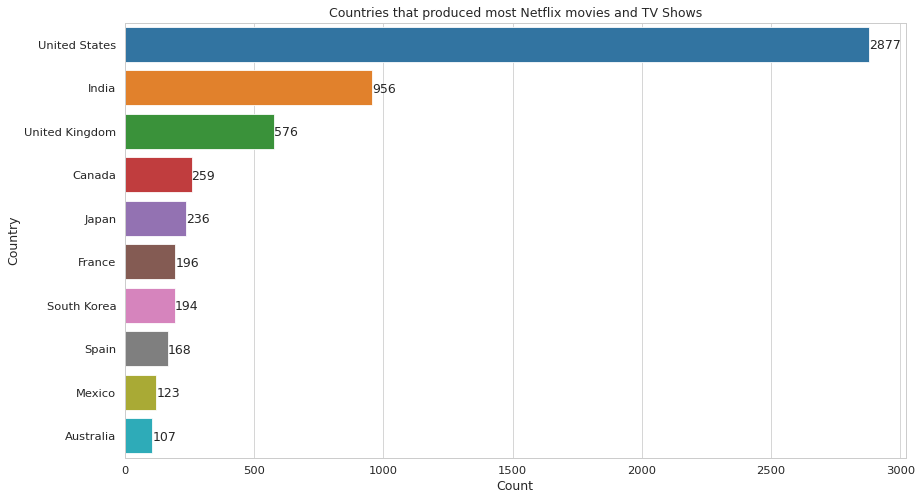

In [ ]:
plt.figure(figsize=(14, 8))
sns.set_context("paper", font_scale = 1.3)

# Visualize using seaborn's countplot
ax=sns.countplot(y = 'country_parsed', 
                 order = netflix_df['country_parsed'].value_counts().drop('Others').index[:10],
                 data = netflix_df)

plt.title('Countries that produced most Netflix movies and TV Shows')
plt.ylabel('Country')
plt.xlabel('Count')

# Place text to get actual values
initialx = 0
for p in ax.patches:
    ax.text(p.get_width(), initialx + p.get_height()/8, (p.get_width()))
    initialx += 1

To become a bit flexible, a function will be created to see which actors from different countries have the most Netflix movies and TV shows.



In [ ]:
# Create a function 
def show_casts(country):
    # add condition here so only countries from this dataset will be the only input
    
    # Create a df containing a specific country, in this case US
    df = cast_df[(cast_df['country_parsed'] == country) & (cast_df['cast'].notna())]
    # Create a list of all casts for that specific country
    casts = [x.strip() for x in ','.join(df['cast']).split(',')]
    # Create pandas' series using the list of casts
    cast_srs = pd.Series(casts)
    # Get the frequency of each actor using pandas series' value_counts()
    cast_count = cast_srs.value_counts()[:10]
    
    # Visualize using seaborn's barplot
    plt.figure(figsize=(14, 8))
    sns.set_context("paper", font_scale = 1.3)

    ax = sns.barplot(x = cast_count.index, y = cast_count)
    
    plt.title('Actors with most Netflix movie and TV shows in ' + country)
    plt.ylabel('Count')
    plt.xlabel('Actors')
    plt.xticks(rotation = 45);

    # add text to each bar
    initialx = 0
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 3, .08 + p.get_height(), int(p.get_height()))

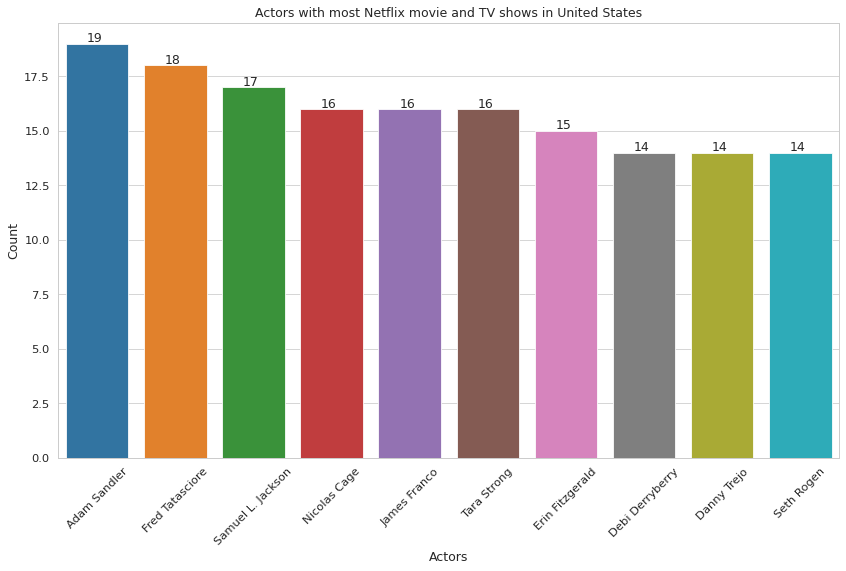

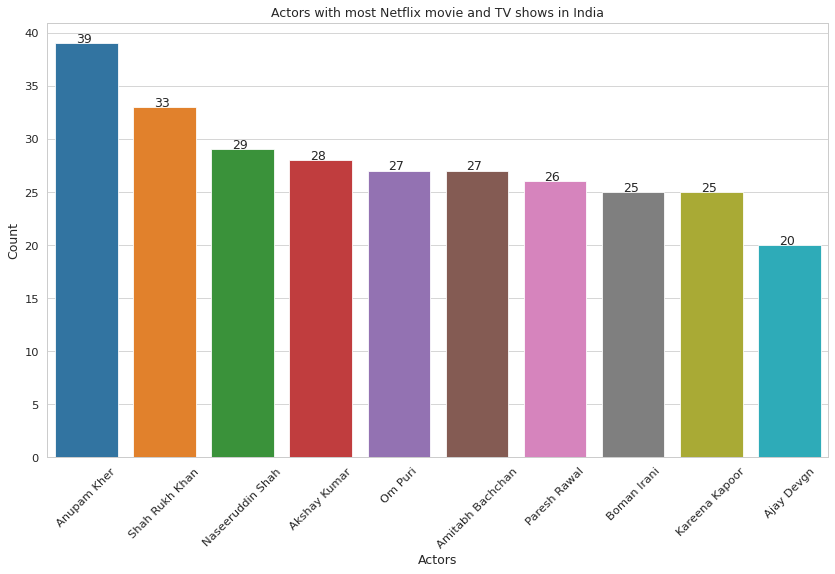

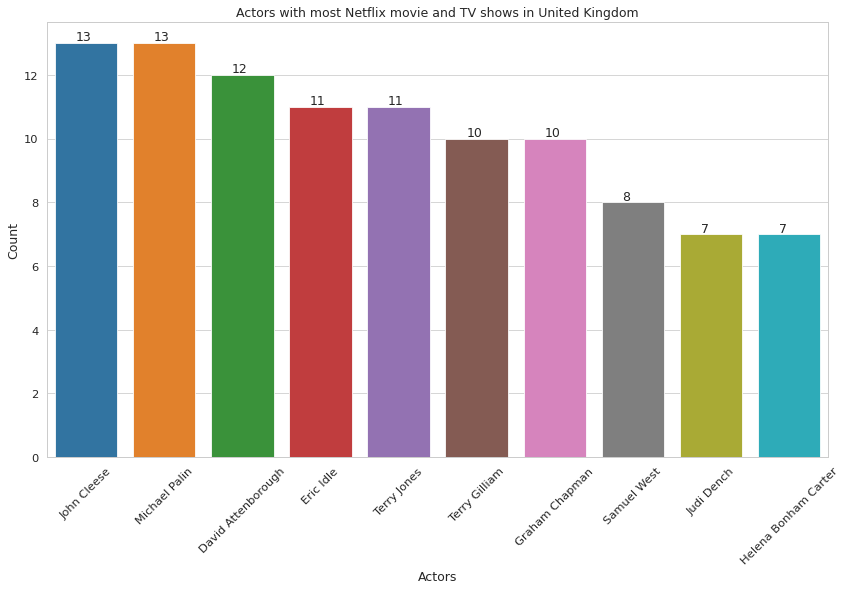

In [ ]:
show_casts('United States')
show_casts('India')
show_casts('United Kingdom')

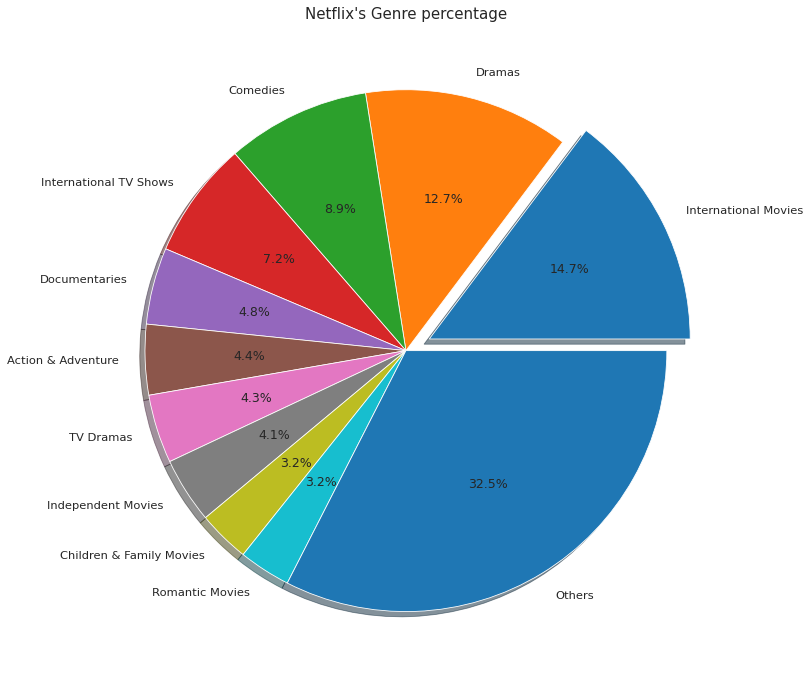

In [ ]:
# Create a list of all genre listed in Netflix
genre_lst = [x.strip() for x in ','.join(netflix_df['listed_in']).split(',')]
# Convert to series
genre_srs = pd.Series(genre_lst)
# Count values and extract the first 10 
genre_count = genre_srs.value_counts()[:10]
# Compute the sum of re
others = pd.Series(sum(genre_srs.value_counts()[11:]), index = ['Others'])
genre_top11 = genre_count.append(others)


plt.figure(figsize=(12, 12))
plt.title("Netflix's Genre percentage", fontsize = 15)
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
plt.pie(genre_top11, labels = genre_top11.index, explode = explode, autopct='%1.1f%%', shadow = True);

In [ ]:
def show_ratings(country):
    # create df for specific country
    df = netflix_df[netflix_df['country_parsed'] == country]
    
    # visualize using seaborn's countplot()
    plt.figure(figsize = (10, 10))
    sns.set_context("paper", font_scale = 1.3)
    ax = sns.countplot(x = 'rating', data=df)
    plt.title("Rating's percentage in "+ country, fontsize = 15)
    plt.xlabel('Rating')
    plt.ylabel('Count')
    
     # add text to each bar
    initialx = 0
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 3, .5 + p.get_height(), int(p.get_height()))

Rating percentage over countries

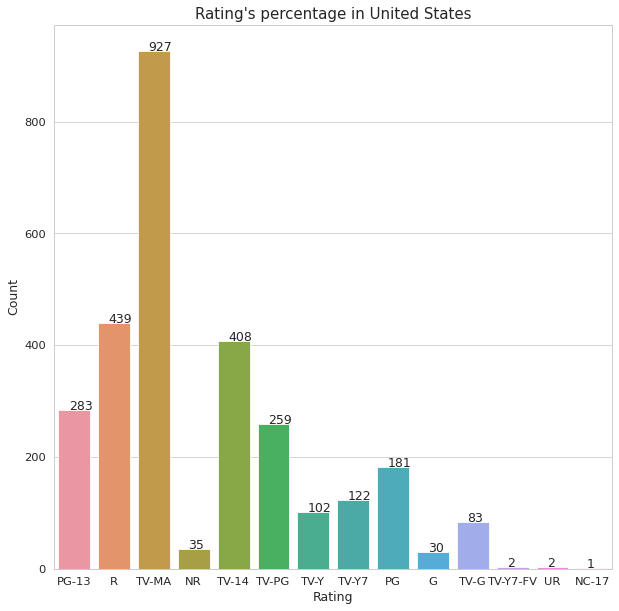

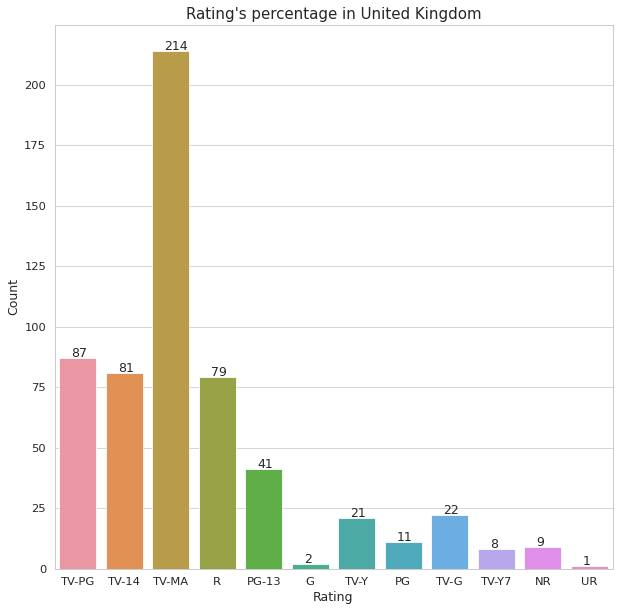

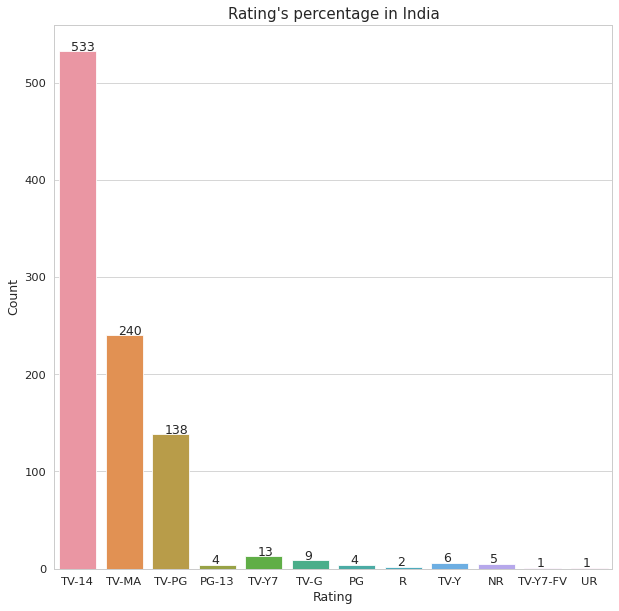

In [ ]:
# Show ratings in top 3 countries that produce Netflix movie and TV shows
show_ratings('United States')
show_ratings('United Kingdom')
show_ratings('India')

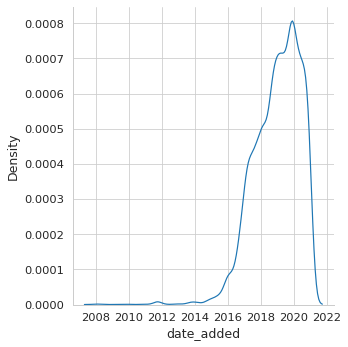

In [ ]:
sns.set_context("paper", font_scale = 1.3)
#Visualize using seaborn''s displot()
sns.displot(netflix_df['date_added'], kind = 'kde');

# ***CONCLUSION***

1)The most content type on Netflix is movies

2)The popular streaming platform started gaining traction after 2014. Since then, the amount of content added has been increasing significantly.

3)The country by the amount of the produces content is the United States.

4)The most popular director on Netflix , with the most titles, is Jan Suter.

5)International Movies is a genre that is mostly in Netflix.

6)The largest count of Netflix content is made with a “TV-14” rating.

7)The most popular actor on Netflix TV Shows based on the number of titles is 
Takahiro Sakurai.

8)The most popular actor on Netflix movie, based on the number of titles, is Anupam Kher.
